I. Do specific sub-types of data-related jobs have higher or lower salaries than others?
- Which companies have the highest salaries for those sub-types?
- Changes with location of the job?
- Will the answer change if I take standard of living into account?


In [2]:
import sqlite3
import pandas as pd

In [3]:
dataset = pd.read_excel("data/salary_data_states.xlsx")

#remove unimportant job sub types
remove = ['attorney','teacher','assistant professor']

dataset = dataset[~dataset['JOB_TITLE_SUBGROUP'].isin(remove)]

#we dont care for guam, palau, northern mariana islands,Puerto Rico, virgin islands
remove_states = ['Guam', 'Palau', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']

# Remove observations with specified work states
dataset = dataset[~dataset['WORK_STATE'].isin(remove_states)]

In [4]:
#Do specific sub-types of data-related jobs have higher or lower salaries than others?
# Group data by job type and calculate median salary for each group
mean_salary_by_job_type = dataset.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median()


sorted_job_types = mean_salary_by_job_type.sort_values(ascending=False)

print(sorted_job_types)

JOB_TITLE_SUBGROUP
data scientist           110000.0
management consultant    100000.0
software engineer         88275.2
business analyst          65000.0
data analyst              65000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


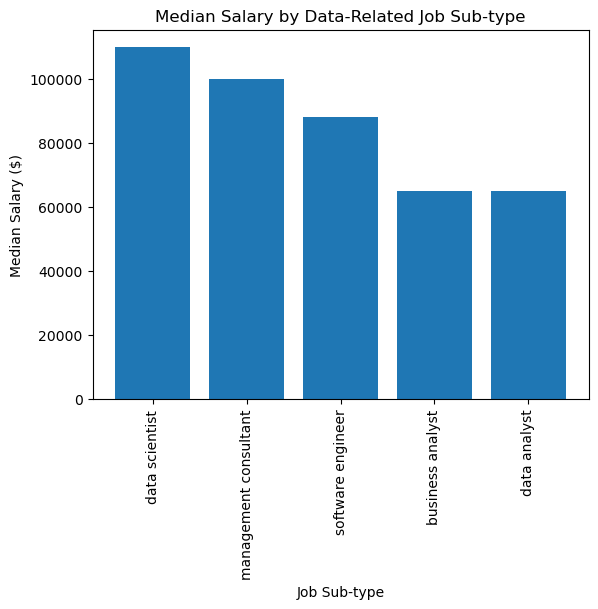

In [5]:
import matplotlib.pyplot as plt
# Create bar graph
plt.bar(sorted_job_types.index, sorted_job_types.values)
plt.xticks(rotation=90)
plt.xlabel('Job Sub-type')
plt.ylabel('Median Salary ($)')
plt.title('Median Salary by Data-Related Job Sub-type')
plt.show()

a. Which companies have the highest salaries for those sub-types?

In [8]:
# Company average salary for data scientist in each company
# Filter the data to include only data scientist job sub-type
df_ds = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'data scientist']

# Group the data by company and calculate the average salary
ds_by_company = df_ds.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean()

# Sort the data in descending order of average salary
ds_by_company = ds_by_company.sort_values(ascending=False)

print(ds_by_company.head(10))

EMPLOYER_NAME
NETFLIX                                   220000.0
THE PNC FINANCIAL SERVICES GROUP, INC.    205000.0
ADOBE SYSTEMS INCORPORATED                181667.0
THE MATLEN SILVER GROUP, INC.             176800.0
BED BATH AND BEYOND, INC.                 175000.0
AVISO, INC.                               165000.0
GUAVUS, INC.                              165000.0
INTENT MEDIA INC.                         163000.0
DATAMINR, INC.                            162500.0
GREEN DOT CORPORATION                     160000.1
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [9]:
# Company average salary for management consultant in each company
# Filter the data to include only job sub-type
df_mc = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'management consultant']

# Group the data by company and calculate the average salary
mc_by_company = df_mc.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean()

# Sort the data in descending order of average salary
mc_by_company = mc_by_company.sort_values(ascending=False)

print(mc_by_company.head(10))

EMPLOYER_NAME
CO-CREATION PARTNERS, INC.          582400.0
BAKER BOTTS L.L.P.                  350000.0
NETFLIX, INC.                       325000.0
DORAN JONES INC.                    250000.0
M MANAGEMENT INC.                   208000.0
EXPRESSWORKS INTERNATIONAL LLC      208000.0
PLASTER & WALD CONSULTING CORP      202800.0
PARTNERS IN PERFORMANCE USA INC.    197000.0
DACAR MANAGEMENT, LLC               176312.0
ARCHILIER INC.                      168334.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [10]:
# Company average salary for software engineer in each company
# Filter the data to include only job sub-type
df_se = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'software engineer']

# Group the data by company and calculate the average salary
se_by_company = df_se.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean()

# Sort the data in descending order of average salary
se_by_company = se_by_company.sort_values(ascending=False)

print(se_by_company.head(10))

EMPLOYER_NAME
SIGMATEK SYSTEMS, LLC           600000.000000
ALIASWIRE, INC.                 528000.000000
LOAD DYNAMIX, INC.              486650.000000
INSIDE, INC.                    474895.666667
KEY                             412500.000000
LANDIS GYR TECHNOLOGY, INC      401912.000000
CWMA NEVADA LLC                 385000.000000
SLV IT SOLUTIONS INC.           385000.000000
MAGNUM ENERGY SOLUTIONS, LLC    343200.000000
XELLERATION, LLC                314454.300000
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [11]:
# Company average salary for business analyst in each company
# Filter the data to include only job sub-type
df_ba = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'business analyst']

# Group the data by company and calculate the average salary
ba_by_company = df_ba.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean()

# Sort the data in descending order of average salary
ba_by_company = ba_by_company.sort_values(ascending=False)

print(ba_by_company.head(10))

EMPLOYER_NAME
THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION        677508.00
OFFICEMAX INCORPORATED                               603711.73
ASCENDUM SOLUTIONS, LLC                              264992.00
ELIE TAHARI LTD.                                     220000.00
HARA-TECH, INC.                                      184683.00
PRECISION GLOBAL CONSULTING INC                      179000.00
LOGIN CONSULTING SERVICES INC                        176800.00
STEVEN DOUGLAS ASSOCIATES, INC.                      175000.00
SOROS FUND MANAGEMENT, LLC                           175000.00
B & R WHOLESALE FLOWER DBA RIVER OAKS PLANT HOUSE    172203.00
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [12]:
# Company average salary for data analyst in each company
# Filter the data to include only job sub-type
df_da = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'data analyst']

# Group the data by company and calculate the average salary
da_by_company = df_da.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean()

# Sort the data in descending order of average salary
da_by_company = da_by_company.sort_values(ascending=False)

print(da_by_company.head(10))

EMPLOYER_NAME
INTUIT                             433161.50
KNOWLEDGENT GROUP INC.             185000.00
NETFLIX, INC.                      177355.25
AVISO, INC.                        165000.00
FIRST REPUBLIC BANK                160000.00
OPEN SYSTEMS TECHNOLOGIES, INC.    150000.00
TELADOC INC                        150000.00
QUIXEY                             150000.00
KNIGHT CAPITAL AMERICAS, L.P.      150000.00
QUIXEY, INC.                       150000.00
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [13]:
#Which companies have the maximum salaries for those sub types
# Group data by job type and find the company that pays the highest salary for each group
highest_salary_by_job_type = dataset.groupby('JOB_TITLE_SUBGROUP').apply(lambda x: x.loc[x['PAID_WAGE_PER_YEAR'].idxmax()])

print(highest_salary_by_job_type[['EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR']])

                                                       EMPLOYER_NAME  \
JOB_TITLE_SUBGROUP                                                     
business analyst       THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION   
data analyst                                                  INTUIT   
data scientist                                         NETFLIX, INC.   
management consultant                     CO-CREATION PARTNERS, INC.   
software engineer                                 KPI PARTNERS, INC.   

                       PAID_WAGE_PER_YEAR  
JOB_TITLE_SUBGROUP                         
business analyst                1250784.0  
data analyst                     746323.0  
data scientist                   230000.0  
management consultant            582400.0  
software engineer               1400000.0  


b. Changes with location of the job?

In [16]:
#salary by state and jobsubgroup
salary_by_subtype_by_state = dataset.groupby(['WORK_STATE', 'JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].median()
salary_by_subtype_by_state.sort_values(ascending = False)

WORK_STATE    JOB_TITLE_SUBGROUP   
Oklahoma      management consultant    141847.5
Connecticut   management consultant    124785.6
New York      management consultant    119995.2
Pennsylvania  management consultant    119995.2
Georgia       management consultant    119995.2
                                         ...   
Nebraska      data analyst              50979.0
Kansas        management consultant     50000.0
North Dakota  data analyst              46779.0
Idaho         data analyst              46399.5
Vermont       data analyst              42000.0
Name: PAID_WAGE_PER_YEAR, Length: 218, dtype: float64

In [27]:
#Find maximum median paying state by Data Scientist
data_analyst_df = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'data scientist']

# Group the filtered data by state and calculate the median paid wage per year
median_wage_by_state = data_analyst_df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].median()

median_wage_by_state.sort_values(ascending = False).head()

WORK_STATE
California              119800.0
Arizona                 115000.0
Washington              115000.0
District of Columbia    114500.0
Minnesota               111457.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [28]:
#Find maximum median paying state by Management Consultant
data_analyst_df = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'management consultant']

# Group the filtered data by state and calculate the median paid wage per year
median_wage_by_state = data_analyst_df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].median()

median_wage_by_state.sort_values(ascending = False).head()

WORK_STATE
Oklahoma        141847.5
Connecticut     124785.6
Pennsylvania    119995.2
New York        119995.2
Georgia         119995.2
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [29]:
#Find maximum median paying state by Software Engineer
data_analyst_df = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'software engineer']

# Group the filtered data by state and calculate the median paid wage per year
median_wage_by_state = data_analyst_df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].median()

median_wage_by_state.sort_values(ascending = False).head()

WORK_STATE
California       105972.5
Washington       105000.0
New York          93621.0
Massachusetts     88691.0
Vermont           85000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [30]:
#Find maximum median paying state by Business Analyst
data_analyst_df = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'business analyst']

# Group the filtered data by state and calculate the median paid wage per year
median_wage_by_state = data_analyst_df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].median()

median_wage_by_state.sort_values(ascending = False).head()

WORK_STATE
Montana        85000.0
Wyoming        81000.0
Washington     75000.0
California     70000.0
Connecticut    70000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [31]:
#Find maximum median paying state by Data Analyst
data_analyst_df = dataset[dataset['JOB_TITLE_SUBGROUP'] == 'data analyst']

# Group the filtered data by state and calculate the median paid wage per year
median_wage_by_state = data_analyst_df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].median()

median_wage_by_state.sort_values(ascending = False).head()

WORK_STATE
Delaware         77700.0
New Hampshire    75591.5
California       75046.0
New Mexico       71869.2
South Dakota     70000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

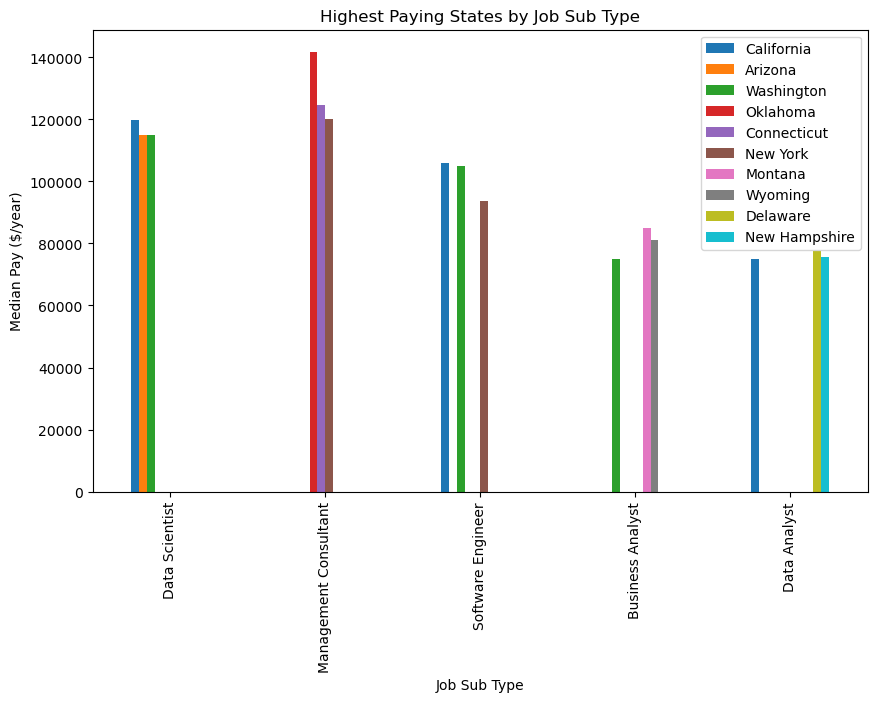

In [18]:

data = {
    'Data Scientist': {'California': 119800, 'Arizona': 115000, 'Washington': 115000},
    'Management Consultant': {'Oklahoma': 141847, 'Connecticut': 124785, 'New York': 119995},
    'Software Engineer': {'California': 105972, 'Washington': 105000, 'New York': 93621},
    'Business Analyst': {'Montana': 85000, 'Wyoming': 81000, 'Washington': 75000},
    'Data Analyst': {'Delaware': 77700, 'New Hampshire': 75591, 'California': 75046}
}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data).T

# Create a bar graph
ax = df.plot(kind='bar', figsize=(10,6))

# Set the title and axis labels
ax.set_title('Highest Paying States by Job Sub Type')
ax.set_xlabel('Job Sub Type')
ax.set_ylabel('Median Pay ($/year)')

plt.show()

c.  Will the answer change if I take standard of living into account?

SyntaxError: invalid syntax (3588603093.py, line 1)

In [21]:
col_df = pd.read_csv('data/CostOfLiving2023.csv')
cost_of_living = col_df[['state','costIndex']]
merged_data = pd.merge(dataset, cost_of_living, left_on='WORK_STATE', right_on='state')
merged_data['ADJUSTED_WAGE'] = (merged_data['PAID_WAGE_PER_YEAR'] / merged_data['costIndex'])*100

df1 = merged_data[['JOB_TITLE','JOB_TITLE_SUBGROUP','WORK_STATE','costIndex','PAID_WAGE_PER_YEAR','ADJUSTED_WAGE']]
df1.sort_values(by = 'ADJUSTED_WAGE')

,JOB_TITLE,JOB_TITLE_SUBGROUP,WORK_STATE,costIndex,PAID_WAGE_PER_YEAR,ADJUSTED_WAGE
68591,BUSINESS ANALYST,business analyst,New York,148.2,20800.0,1.403509e+04
127848,INTERNATIONAL BUSINESS ANALYST,business analyst,Hawaii,193.3,39600.0,2.048629e+04
127847,INTERNATIONAL BUSINESS ANALYST,business analyst,Hawaii,193.3,39600.0,2.048629e+04
128038,BUSINESS ANALYST,business analyst,Louisiana,93.0,20000.0,2.150538e+04
127846,INTERNATIONAL BUSINESS ANALYST,business analyst,Hawaii,193.3,42700.0,2.209002e+04
...,...,...,...,...,...,...
113039,SOFTWARE ENGINEER,software engineer,Georgia,88.8,1080000.0,1.216216e+06
82275,NETWORK SOFTWARE ENGINEER IV,software engineer,Texas,92.1,1224800.6,1.329860e+06
83767,BUSINESS ANALYST II,business analyst,Texas,92.1,1250784.0,1.358072e+06
83766,BUSINESS ANALYST II,business analyst,Texas,92.1,1250784.0,1.358072e+06


In [22]:
adjusted_salary_by_job = df1.groupby('JOB_TITLE_SUBGROUP')['ADJUSTED_WAGE'].median()
sorted_adjusted_salary = adjusted_salary_by_job.sort_values(ascending = False)
sorted_adjusted_salary

JOB_TITLE_SUBGROUP
management consultant    87602.812940
data scientist           83829.113924
software engineer        74170.124481
business analyst         61715.616054
data analyst             61027.777778
Name: ADJUSTED_WAGE, dtype: float64

In [23]:
adjusted_salary_by_state = df1.groupby('WORK_STATE')['ADJUSTED_WAGE'].median()
adjusted_salary_by_state.sort_values(ascending = False)

WORK_STATE
Washington        91397.849462
Mississippi       82232.893157
Utah              80531.313131
Kansas            78612.716763
Tennessee         78292.134831
Louisiana         77419.354839
Georgia           77322.072072
Iowa              76195.773081
Texas             76004.343105
North Carolina    75862.068966
Missouri          75723.830735
Illinois          75710.498409
New Mexico        74945.054945
Nevada            74847.601129
California        73839.662447
Michigan          73676.889376
Ohio              73384.446878
Pennsylvania      73170.731707
Colorado          73086.419753
Wisconsin         72614.107884
Nebraska          72611.526147
Alabama           72503.981797
Minnesota         72125.000000
Arizona           71126.937984
Kentucky          70676.691729
Indiana           70640.176600
Virginia          70347.740668
South Carolina    69444.444444
Arkansas          69308.580858
Oklahoma          69215.017065
Vermont           68589.743590
New Hampshire     67115.9235

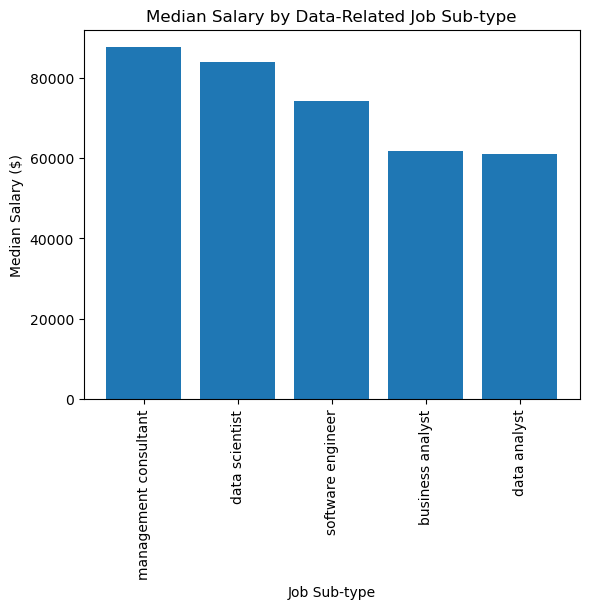

In [24]:
# Create bar graph
plt.bar(sorted_adjusted_salary.index, sorted_adjusted_salary.values)
plt.xticks(rotation=90)
plt.xlabel('Job Sub-type')
plt.ylabel('Median Salary ($)')
plt.title('Median Salary by Data-Related Job Sub-type')
plt.show()